# Manchu Dataset

## Manchu Script Dataset Creation for Machine Learning Classification Using Narrowest-Width Segmentation Method

Aaron Daniel Snowberger, Choong Ho Lee2

1. Student, Information and Communications Engineering, Hanbat University, South Korea, aaron@edu.hanbat.ac.kr
2. Professor, Information and Communications Engineering, Hanbat University, South Korea, chlee@hanbat.ac.kr

Corresponding author: Aaron Snowberger

### Abstract: 

(1) Background: Manchu is a script that is written vertically, from top to bottom, with each letter in a word connected by a central stem. Since there are no spaces between the letters in a given word, a preprocessing method is required in order to segment the individual character units from a given word before any kind of character recognition can be performed. (2) Methods: In this paper, we describe a preprocessing method that effectively segments an image of Manchu script words into individual character units. Unlike existing research that first removes the cen-tral stem of a word in order to recognize the remaining pieces to the left and right of the stem, or attempts to perform recognition tasks on whole words and not the individual characters within the words, this method cuts each vertical word horizontally into recognizable character units. (3) Results: This preprocessing method was applied to over 500 images of Manchu script to quickly segment over 50,000 individual character units. (4) Conclusions: Character recognition can then be applied to the individual character units that are separated out from each word with pattern matching or processing through a neural network.

### Keywords: 

[Manchu Characters](https://en.wikipedia.org/wiki/Manchu_alphabet), Character Recognition, Preprocessing, Dataset Creation, Pattern Recognition

# 1. Load data

## 1.1 Import helper functions

In [1]:
# imports
import cv2
import os
import sys
import random
import numpy as np
import matplotlib.pyplot as plt

# Add directory above current directory to path
sys.path.insert(0, '..')

# project specific helper functions
import util.helpers as helpers
import util.preprocess as prep
import util.cutters as cut

## 1.2 Set Variables

In [2]:
# important variables
data_folder = 'C:/Users/Aaron/Desktop/Dev/Hanbat/project-manchu-FULL/Manchu Images/1. Cropped/'
save_folder = 'C:/Users/Aaron/Desktop/Dev/Hanbat/project-manchu-FULL/Manchu Images/2. Cut/'
img_folder = 'b_mat/'

test = 10 # test image index

# Threshold - some images produce errors with individual columns of 1 or 2 pixels on their own.
# We don't want to cut these, so ignore anything below a certain threshold.
cut_thres = 3

imread_flag = cv2.IMREAD_GRAYSCALE # 0
debug = 1

In [3]:
data, filenames = helpers.load_images_from_folder(os.path.join(data_folder, img_folder))

# Check our data
num_img = len(data)
print("# of images loaded:", num_img) # how many images did we import?
print("Size of test image:", data[test].shape)

# of images loaded: 79
Size of test image: (2496, 1878)


In [4]:
print(filenames)

['p01.jpg', 'p03.jpg', 'p04.jpg', 'p05.jpg', 'p06.jpg', 'p07.jpg', 'p08.jpg', 'p09.jpg', 'p10.jpg', 'p11.jpg', 'p12.jpg', 'p13.jpg', 'p14.jpg', 'p15.jpg', 'p16.jpg', 'p17.jpg', 'p18.jpg', 'p19.jpg', 'p20.jpg', 'p21.jpg', 'p22.jpg', 'p23.jpg', 'p24.jpg', 'p25.jpg', 'p26.jpg', 'p27.jpg', 'p28.jpg', 'p29.jpg', 'p30.jpg', 'p31.jpg', 'p32.jpg', 'p33.jpg', 'p34.jpg', 'p35.jpg', 'p36.jpg', 'p37.jpg', 'p38.jpg', 'p39.jpg', 'p40.jpg', 'p41.jpg', 'p42.jpg', 'p43.jpg', 'p44.jpg', 'p45.jpg', 'p46.jpg', 'p47.jpg', 'p48.jpg', 'p49.jpg', 'p50.jpg', 'p51.jpg', 'p52.jpg', 'p53.jpg', 'p54.jpg', 'p55.jpg', 'p56.jpg', 'p57.jpg', 'p58.jpg', 'p59.jpg', 'p60.jpg', 'p61.jpg', 'p62.jpg', 'p63.jpg', 'p64.jpg', 'p65.jpg', 'p66.jpg', 'p67.jpg', 'p68.jpg', 'p69.jpg', 'p70.jpg', 'p71.jpg', 'p72.jpg', 'p73.jpg', 'p74.jpg', 'p75.jpg', 'p76.jpg', 'p77.jpg', 'p78.jpg', 'p79.jpg', 'p80.jpg']


## 1.3 Create Informational Dataframe

This will be used to keep track of all the important information about the images, cut lines, and so on.

In [5]:
# Import pandas library
import pandas as pd
 
# initialize data of lists.
info = {'Image':filenames}
 
# Create DataFrame
df = pd.DataFrame(info)
 
# print dataframe.
df

,Image
0,p01.jpg
1,p03.jpg
2,p04.jpg
3,p05.jpg
4,p06.jpg
...,...
74,p76.jpg
75,p77.jpg
76,p78.jpg
77,p79.jpg


---
# 2. Pre-process Images

## 2.1 Visualize Data

# of images loaded: 79
Size of image #10: (2496, 1878)


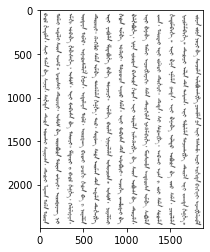

In [6]:
# data = prep.resize_images(data)

# Check our data
print("# of images loaded:", len(data)) # how many images did we import?
print(f"Size of image #{test}: {data[test].shape}")

# Visualize the test image
plt.imshow(data[test], cmap = plt.get_cmap('gray'))
plt.show()

## 2.2 Clean Noise

Perform erosion and dilation on the image to try to clean up some of the background noise, and fill in missing gaps in the script.

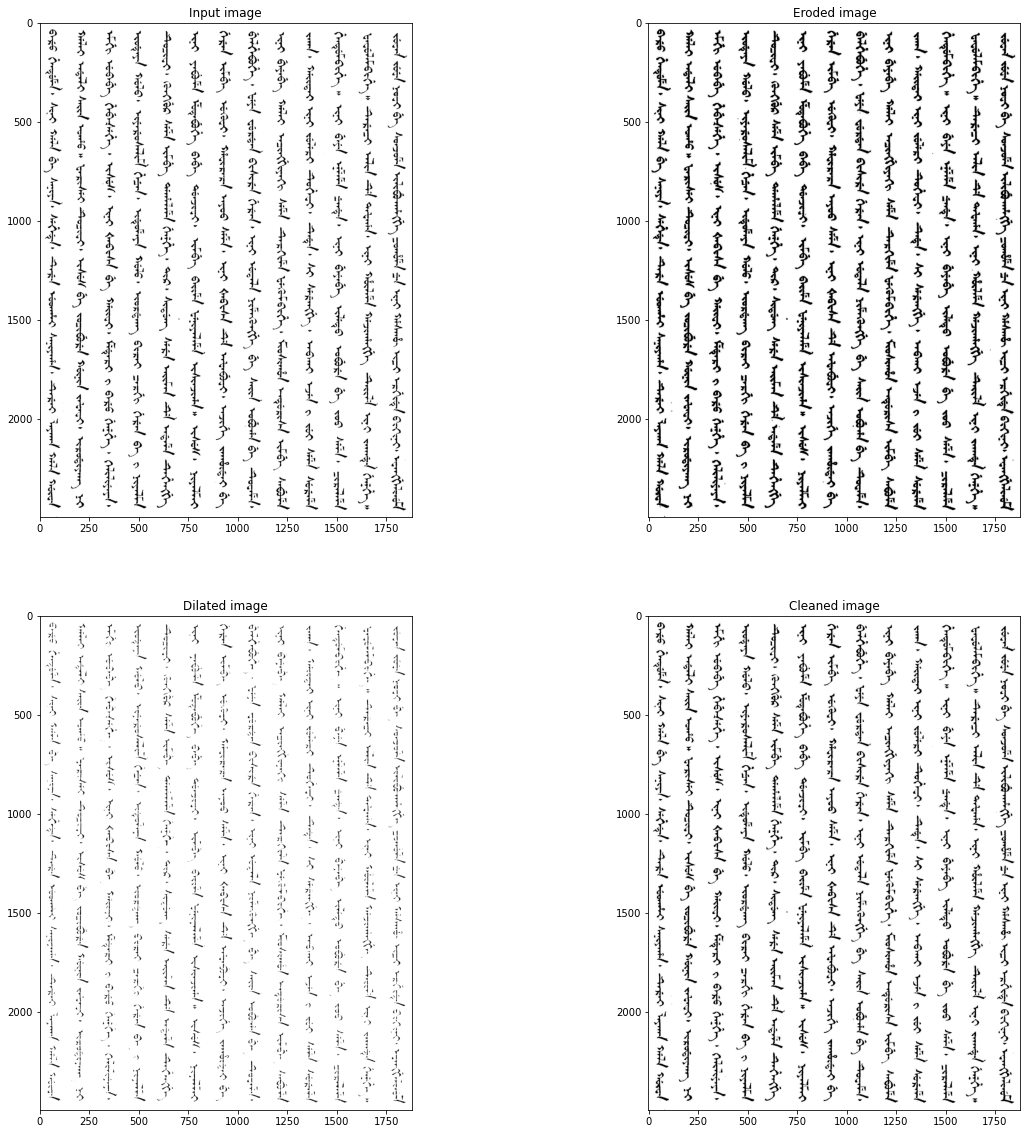

In [7]:
prep.clean_single(data[test], 3, 1);

In [8]:
cleaned = prep.clean_multiple(data)

## 2.2a Resize?

## 2.3 Binarize Images

In [9]:
bin_dataset, ibin_dataset = prep.binarize_multiple(data)

Debugging & Visualization:

Dataset size: 79

Images sizes for first 5 images:
0: (2193, 328)
1: (2466, 1860)
2: (2463, 1869)
3: (2481, 1863)
4: (2457, 1866)

Visualizing Image 1:


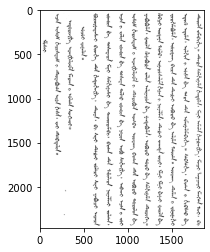

In [10]:
helpers.visualize_dataset(bin_dataset)

Debugging & Visualization:

Dataset size: 79

Images sizes for first 5 images:
0: (2193, 328)
1: (2466, 1860)
2: (2463, 1869)
3: (2481, 1863)
4: (2457, 1866)

Visualizing Image 0:


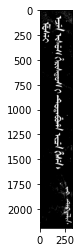

In [11]:
helpers.visualize_dataset(ibin_dataset)

---

# 3. Find Font Areas

## 3.1 Find Lines Cut Points

For single image processing:

1. Count nonzero values (in the inverse-binary image)
2. Estimate cut points (this will be over-estimated due to occasional stray pixels)
3. Fix cut points (visualize if debugging) and SAVE the values

For multiple image processing:

1. Lines first - scan by width (dimension = 1)
2. Words second - scan by height(dimension = 0)
3. Letters last - IF necessary (determine threshold under which we don't need to check)

Image dimension =  1878

Before scanning:
 [0 0 0 ... 0 0 0]

After scanning:
 [0 0 0 ... 0 0 0]

Possible font areas =  19


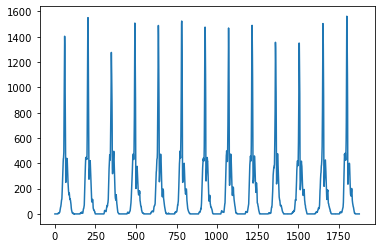

In [12]:
count, values = cut.count_nonzeros(bin_dataset[test], 1, 1)

In [13]:
cut_pts = cut.estimate_cut_points(values)

In [14]:
print(cut_pts)

[[18, 114], [117, 119], [119, 121], [155, 249], [302, 395], [444, 548], [589, 690], [697, 705], [738, 833], [882, 885], [885, 975], [1023, 1124], [1173, 1263], [1315, 1411], [1435, 1437], [1459, 1554], [1604, 1706], [1728, 1730], [1754, 1852]]


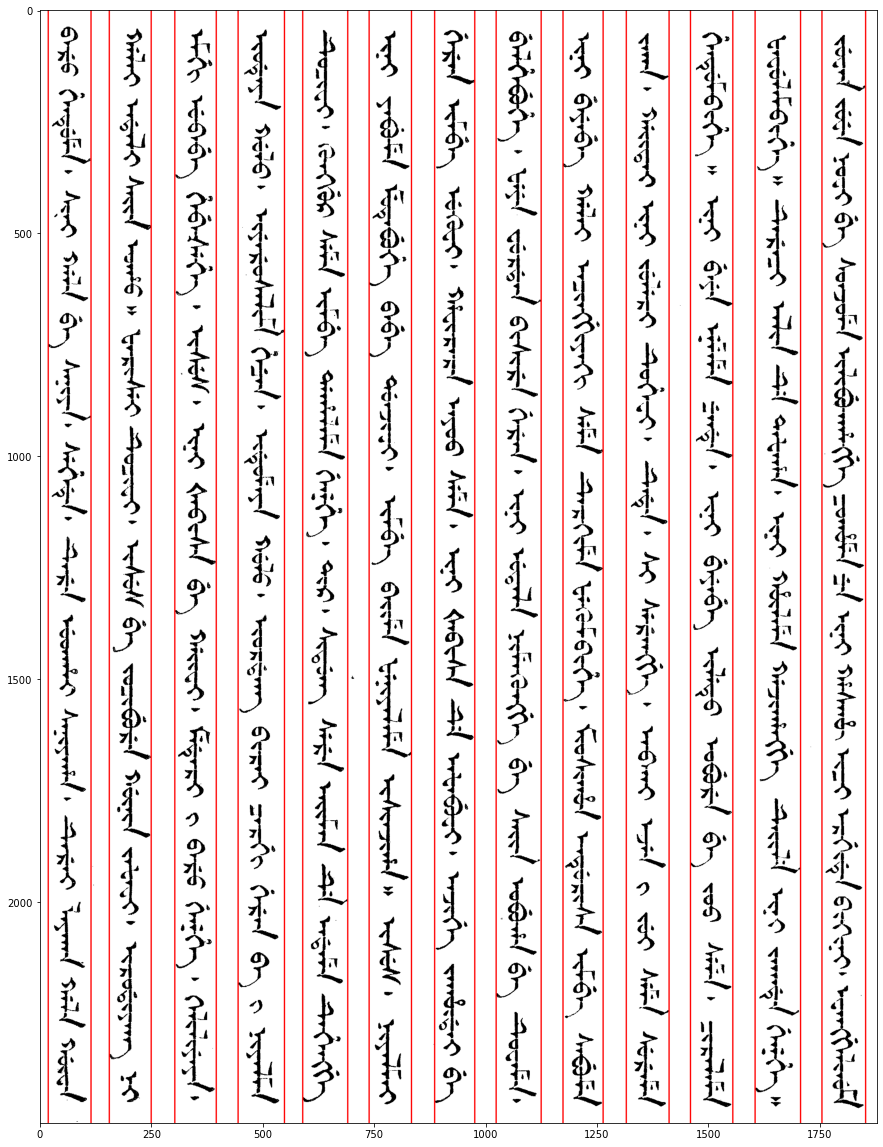

In [15]:
true_cut_pts = cut.fix_cut_points(cut_pts, 20, 1, bin_dataset[test]);

In [16]:
print(true_cut_pts)
print('Number of font areas: {}'.format(len(true_cut_pts) / 2))

[18, 114, 155, 249, 302, 395, 444, 548, 589, 690, 738, 833, 885, 975, 1023, 1124, 1173, 1263, 1315, 1411, 1459, 1554, 1604, 1706, 1754, 1852]
Number of font areas: 13.0


In [17]:
data_cutpts, font_areas = cut.cutpts_multiple(data)

In [18]:
# Add info to Dataframe
df['Lines'] = font_areas
df['Line Cut Pts'] = data_cutpts

# print Dataframe
df

,Image,Lines,Line Cut Pts
0,p01.jpg,0.0,[]
1,p03.jpg,14.0,"[23, 88, 119, 136, 151, 400, 447, 544, 575, 69..."
2,p04.jpg,15.0,"[15, 128, 159, 272, 311, 417, 421, 436, 436, 5..."
3,p05.jpg,17.0,"[15, 119, 119, 136, 152, 271, 303, 415, 439, 5..."
4,p06.jpg,13.0,"[7, 120, 143, 264, 279, 416, 431, 560, 583, 70..."
...,...,...,...
74,p76.jpg,17.0,"[15, 120, 159, 272, 279, 408, 439, 552, 591, 6..."
75,p77.jpg,14.0,"[23, 128, 159, 272, 311, 424, 463, 568, 599, 7..."
76,p78.jpg,14.0,"[0, 112, 145, 256, 279, 408, 423, 544, 567, 71..."
77,p79.jpg,13.0,"[23, 120, 151, 256, 303, 408, 447, 544, 591, 6..."
